## Import Data

In [27]:
import re
import emoji
import pandas as pd
import numpy as np

data = pd.read_excel('dataset(augmented)2.xlsx')
data

,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3.0,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,kenapa hanya ustadz kenapa bukan guru yang tid...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0.0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
2,2022-11-14 22:44:42+00:00,wawanikip,0.0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health tapi gak mengerti...
3,2022-12-20 08:12:15+00:00,minkabora,0.0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya siapa yang benar berjuang ga menyera...
4,2022-12-01 14:21:33+00:00,wipilarpa,0.0,Kalau lingkungan kerjanya sama kaya yg di Band...,Others,kalau lingkungan kerjanya sama kaya yang di ba...
...,...,...,...,...,...,...
7023,NaN,NaN,NaN,"Saat ini, isu kesehatan mental lebih diakui da...",Stigma,NaN
7024,NaN,NaN,NaN,"Sekarang, topik kesehatan mental lebih terbuka...",Stigma,NaN
7025,NaN,NaN,NaN,"Kini, isu kesehatan mental lebih terbuka dan a...",Stigma,NaN
7026,NaN,NaN,NaN,"Pada masa kini, isu kesehatan mental lebih ter...",Stigma,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028 entries, 0 to 7027
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     3828 non-null   object 
 1   Username     3828 non-null   object 
 2   Like Counts  3828 non-null   float64
 3   Tweet        7028 non-null   object 
 4   Class        7028 non-null   object 
 5   cleanText    3828 non-null   object 
dtypes: float64(1), object(5)
memory usage: 329.6+ KB


## Preprocessing

In [29]:
data = data[data.Class != '-']

In [30]:
slang_words = {"amp": "dan", "@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "skg": "sekarang", "skrg": "sekarang", "skrng": "sekarang", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkwk": "tertawa","wkwk": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "bundir": "bunuh diri"}

In [31]:
def apply_abbreviations(text):
    words = text.split()
    abbreviated_words = [slang_words.get(word, word) for word in words]
    return ' '.join(abbreviated_words)

In [32]:
def cleanTweets(text):
    text = re.sub(r'@\w+', '', text) 
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('#','',text)
    text = re.sub('\d+', '', text)
    text = re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]+','', text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text
data['cleanText'] = data['Tweet'].apply(cleanTweets) 
data

,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3.0,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,knp hanya ustadz knp bkn guru yg tdk cukup me...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0.0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
2,2022-11-14 22:44:42+00:00,wawanikip,0.0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health tapi gak ngerti a...
3,2022-12-20 08:12:15+00:00,minkabora,0.0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya siapa yang bener berjuang ga meny...
4,2022-12-01 14:21:33+00:00,wipilarpa,0.0,Kalau lingkungan kerjanya sama kaya yg di Band...,Others,kalau lingkungan kerjanya sama kaya yg di band...
...,...,...,...,...,...,...
7023,NaN,NaN,NaN,"Saat ini, isu kesehatan mental lebih diakui da...",Stigma,saat ini isu kesehatan mental lebih diakui da...
7024,NaN,NaN,NaN,"Sekarang, topik kesehatan mental lebih terbuka...",Stigma,sekarang topik kesehatan mental lebih terbuka...
7025,NaN,NaN,NaN,"Kini, isu kesehatan mental lebih terbuka dan a...",Stigma,kini isu kesehatan mental lebih terbuka dan a...
7026,NaN,NaN,NaN,"Pada masa kini, isu kesehatan mental lebih ter...",Stigma,pada masa kini isu kesehatan mental lebih ter...


In [33]:
data['cleanText'] = data['cleanText'].apply(apply_abbreviations)

## Target Class Distribution (Data Original)

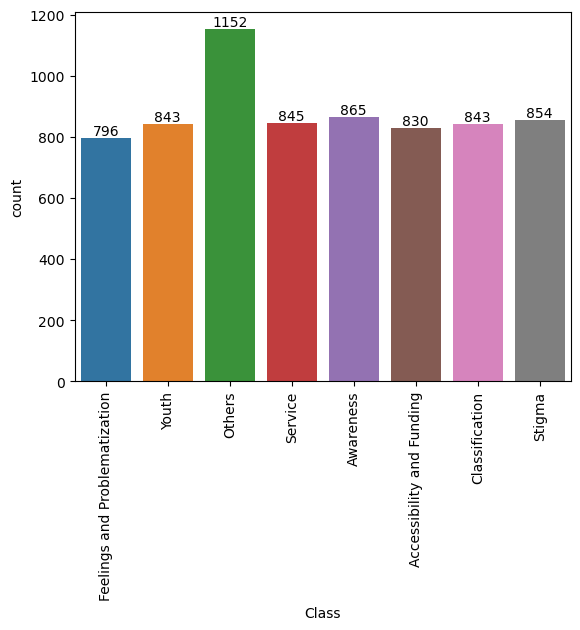

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=data['Class'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

In [35]:
data.Class.value_counts()

Others                           1152
Awareness                         865
Stigma                            854
Service                           845
Youth                             843
Classification                    843
Accessibility and Funding         830
Feelings and Problematization     796
Name: Class, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = data[data.Class != 'Others']
data['Class'] = le.fit_transform(data['Class'])

## Target Class Distribution (7 Class, Except Others)

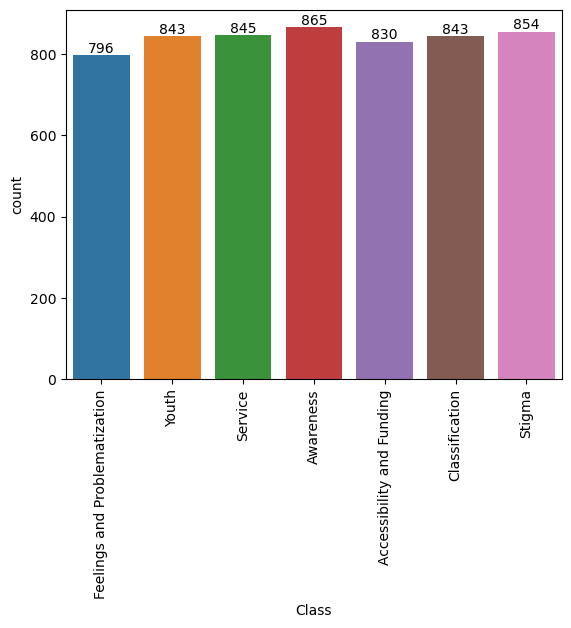

In [37]:
ax = sns.countplot(x=data['Class'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

In [38]:
p

NameError: name 'p' is not defined

## Bag of Words 

In [ ]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [ ]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(max_sequence_length,), dtype='int32'))
model.add(tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 16))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 63, 16)            161728    
                                                                 
 flatten (Flatten)           (None, 1008)              0         
                                                                 
 dense (Dense)               (None, 7)                 7063      
                                                                 
Total params: 168791 (659.34 KB)
Trainable params: 168791 (659.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=43)

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/30
166/166 [==============================] - 0s 2ms/step - loss: 1.8537 - accuracy: 0.2536 - val_loss: 1.7499 - val_accuracy: 0.3010
Epoch 2/30
166/166 [==============================] - 0s 1ms/step - loss: 1.5008 - accuracy: 0.4966 - val_loss: 1.3388 - val_accuracy: 0.5680
Epoch 3/30
166/166 [==============================] - 0s 1ms/step - loss: 0.9762 - accuracy: 0.7642 - val_loss: 0.9472 - val_accuracy: 0.7432
Epoch 4/30
166/166 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.8727 - val_loss: 0.7489 - val_accuracy: 0.7908
Epoch 5/30
166/166 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.9264 - val_loss: 0.6456 - val_accuracy: 0.8163
Epoch 6/30
166/166 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.9531 - val_loss: 0.5835 - val_accuracy: 0.8299
Epoch 7/30
166/166 [==============================] - 0s 1ms/step - loss: 0.1962 - accuracy: 0.9697 - val_loss: 0.5470 - val_accuracy: 0.8316
Epoch 

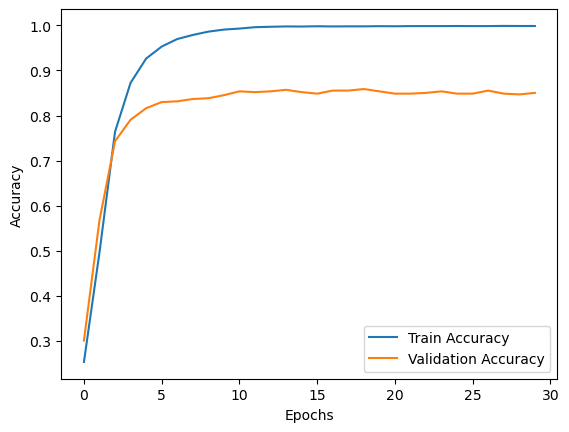

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

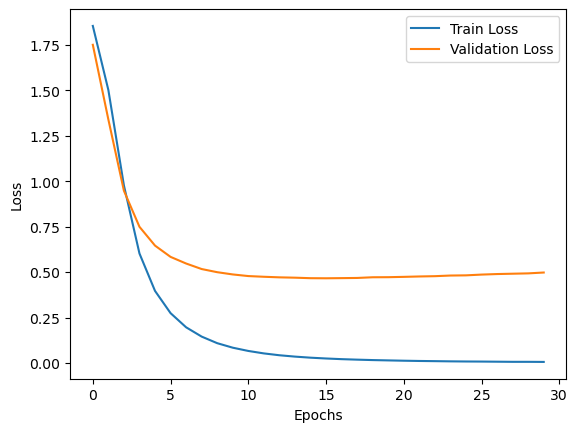

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

19/19 [==============================] - 0s 360us/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.90      0.97      0.94        78
                    Awareness       0.73      0.74      0.73        76
               Classification       0.93      0.93      0.93        71
Feelings and Problematization       0.70      0.63      0.67        90
                      Service       0.93      0.92      0.93        88
                       Stigma       0.85      0.88      0.86        88
                        Youth       0.90      0.90      0.90        97

                     accuracy                           0.85       588
                    macro avg       0.85      0.85      0.85       588
                 weighted avg       0.85      0.85      0.85       588



## TF-IDF 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(data['cleanText'].to_list())

In [ ]:
features = tfidf_features.toarray()
labels = np.array(data['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
train_sequences, val_sequences, train_labels, val_labels = train_test_split(features, labels, test_size=0.1, random_state=20)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(train_sequences.shape[1],)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               2582784   
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 2584583 (9.86 MB)
Trainable params: 2584583 (9.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
166/166 [==============================] - 1s 5ms/step - loss: 1.3465 - accuracy: 0.6927 - val_loss: 0.7607 - val_accuracy: 0.8180
Epoch 2/30
166/166 [==============================] - 1s 4ms/step - loss: 0.3672 - accuracy: 0.9315 - val_loss: 0.4631 - val_accuracy: 0.8503
Epoch 3/30
166/166 [==============================] - 1s 5ms/step - loss: 0.1278 - accuracy: 0.9792 - val_loss: 0.3971 - val_accuracy: 0.8673
Epoch 4/30
166/166 [==============================] - 1s 4ms/step - loss: 0.0591 - accuracy: 0.9938 - val_loss: 0.3787 - val_accuracy: 0.8622
Epoch 5/30
166/166 [==============================] - 1s 4ms/step - loss: 0.0333 - accuracy: 0.9966 - val_loss: 0.3763 - val_accuracy: 0.8656
Epoch 6/30
166/166 [==============================] - 1s 5ms/step - loss: 0.0212 - accuracy: 0.9981 - val_loss: 0.3844 - val_accuracy: 0.8554
Epoch 7/30
166/166 [==============================] - 1s 4ms/step - loss: 0.0159 - accuracy: 0.9983 - val_loss: 0.3769 - val_accuracy: 0.8639
Epoch 

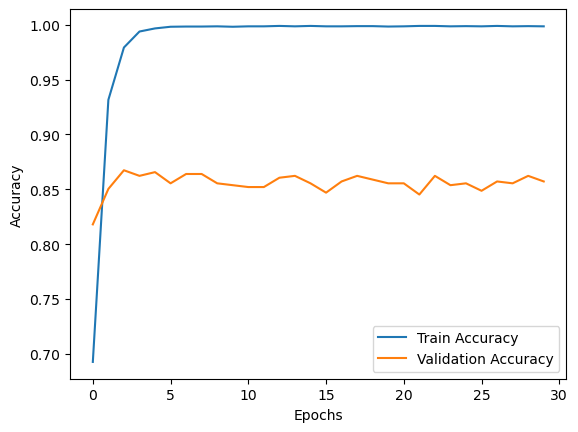

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

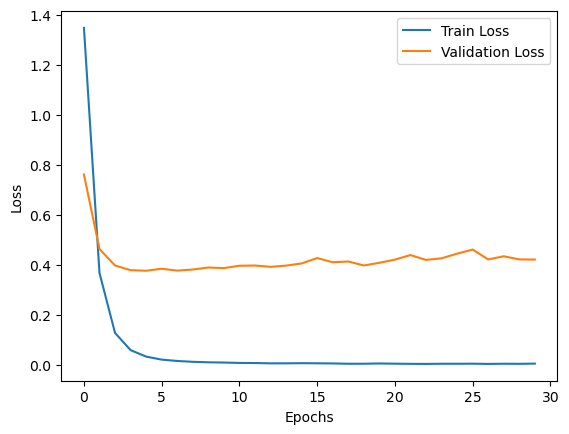

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

19/19 [==============================] - 0s 2ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.93      0.92      0.93        89
                    Awareness       0.82      0.79      0.81        95
               Classification       0.84      0.90      0.87        72
Feelings and Problematization       0.70      0.64      0.67        78
                      Service       0.94      0.88      0.91        86
                       Stigma       0.89      0.91      0.90        94
                        Youth       0.84      0.95      0.89        74

                     accuracy                           0.86       588
                    macro avg       0.85      0.86      0.85       588
                 weighted avg       0.86      0.86      0.86       588



## N-Grams

### 2-Grams

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data['cleanText'], np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(2, 2))

In [ ]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                962944    
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 963063 (3.67 MB)
Trainable params: 963063 (3.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=30, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/30
166/166 [==============================] - 1s 8ms/step - loss: 1.6394 - accuracy: 0.6354 - val_loss: 1.2808 - val_accuracy: 0.7398
Epoch 2/30
166/166 [==============================] - 1s 7ms/step - loss: 0.6105 - accuracy: 0.9535 - val_loss: 0.8353 - val_accuracy: 0.7840
Epoch 3/30
166/166 [==============================] - 1s 6ms/step - loss: 0.1930 - accuracy: 0.9892 - val_loss: 0.7044 - val_accuracy: 0.8010
Epoch 4/30
166/166 [==============================] - 1s 6ms/step - loss: 0.0911 - accuracy: 0.9951 - val_loss: 0.6509 - val_accuracy: 0.8044
Epoch 5/30
166/166 [==============================] - 1s 6ms/step - loss: 0.0542 - accuracy: 0.9966 - val_loss: 0.6219 - val_accuracy: 0.7993
Epoch 6/30
166/166 [==============================] - 1s 6ms/step - loss: 0.0353 - accuracy: 0.9975 - val_loss: 0.6056 - val_accuracy: 0.7959
Epoch 7/30
166/166 [==============================] - 1s 7ms/step - loss: 0.0259 - accuracy: 0.9977 - val_loss: 0.5912 - val_accuracy: 0.8010
Epoch 

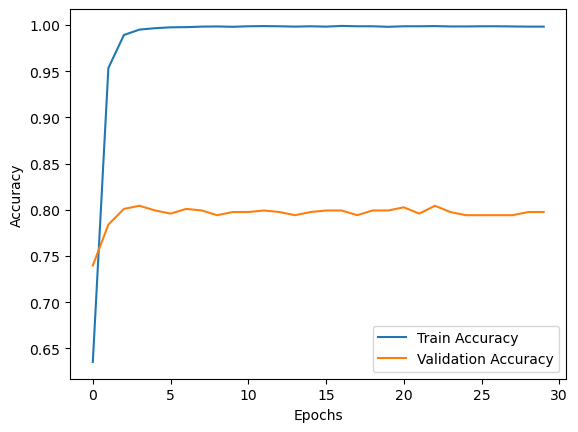

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

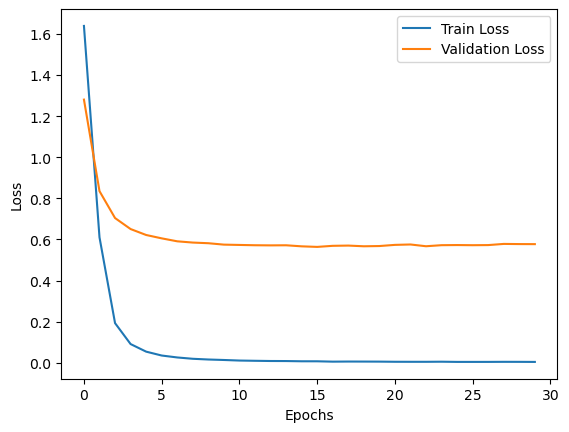

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_vectors)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, test_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

19/19 [==============================] - 0s 4ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.84      0.95      0.89        78
                    Awareness       0.91      0.66      0.76       126
               Classification       0.71      0.96      0.82        57
Feelings and Problematization       0.65      0.60      0.62        77
                      Service       0.88      0.86      0.87        83
                       Stigma       0.85      0.80      0.82       102
                        Youth       0.70      0.89      0.78        65

                     accuracy                           0.80       588
                    macro avg       0.79      0.82      0.80       588
                 weighted avg       0.81      0.80      0.79       588



### 3-Grams

In [ ]:
vectorizer = CountVectorizer(ngram_range=(3,3))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(3, 3))

In [ ]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                1469120   
                                                                 
 flatten_3 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 7)                 119       
                                                                 
Total params: 1469239 (5.60 MB)
Trainable params: 1469239 (5.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=30, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/30
166/166 [==============================] - 2s 11ms/step - loss: 1.7970 - accuracy: 0.4760 - val_loss: 1.5705 - val_accuracy: 0.6088
Epoch 2/30
166/166 [==============================] - 2s 10ms/step - loss: 0.7970 - accuracy: 0.9491 - val_loss: 1.1283 - val_accuracy: 0.7126
Epoch 3/30
166/166 [==============================] - 2s 10ms/step - loss: 0.2190 - accuracy: 0.9941 - val_loss: 0.9880 - val_accuracy: 0.7211
Epoch 4/30
166/166 [==============================] - 2s 9ms/step - loss: 0.0911 - accuracy: 0.9964 - val_loss: 0.9304 - val_accuracy: 0.7143
Epoch 5/30
166/166 [==============================] - 1s 9ms/step - loss: 0.0506 - accuracy: 0.9979 - val_loss: 0.9005 - val_accuracy: 0.7177
Epoch 6/30
166/166 [==============================] - 1s 8ms/step - loss: 0.0326 - accuracy: 0.9979 - val_loss: 0.8811 - val_accuracy: 0.7160
Epoch 7/30
166/166 [==============================] - 1s 8ms/step - loss: 0.0234 - accuracy: 0.9983 - val_loss: 0.8704 - val_accuracy: 0.7126
Epo

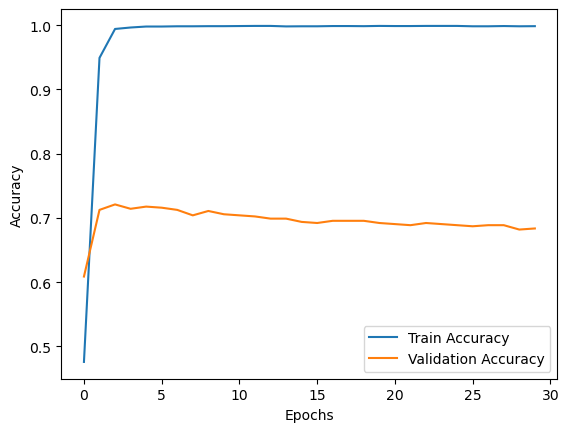

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

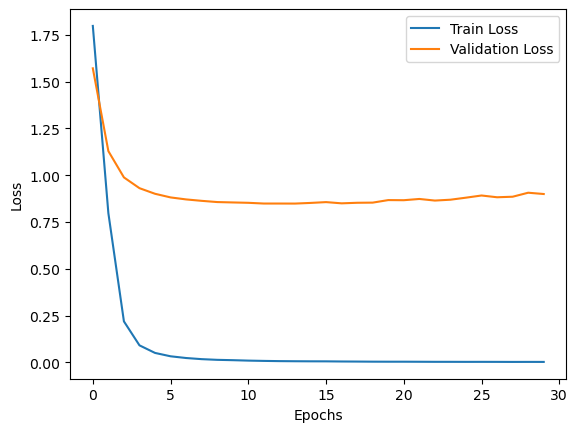

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_vectors)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, test_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

19/19 [==============================] - 0s 6ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.76      0.89      0.82        75
                    Awareness       0.96      0.42      0.58       209
               Classification       0.61      0.98      0.75        48
Feelings and Problematization       0.24      0.52      0.33        33
                      Service       0.79      0.89      0.84        72
                       Stigma       0.73      0.78      0.76        91
                        Youth       0.59      0.82      0.69        60

                     accuracy                           0.68       588
                    macro avg       0.67      0.76      0.68       588
                 weighted avg       0.77      0.68      0.68       588



## FastText

In [ ]:
import fasttext

ft = fasttext.load_model('../../fasttext/cc.id.300.bin')

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
embedding_dim = 300  # Dimensionality of the word embeddings

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in ft:
        embedding_matrix[i] = ft[word]

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 63, 300)           3032400   
                                                                 
 bidirectional (Bidirection  (None, 63, 128)           186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 3260951 (12.44 MB)
Trainable params: 228551 (892.78 KB)
Non-trainable params: 3032400 (11.57 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/30
166/166 [==============================] - 31s 166ms/step - loss: 1.6103 - accuracy: 0.3691 - val_loss: 1.2300 - val_accuracy: 0.5459
Epoch 2/30
166/166 [==============================] - 32s 193ms/step - loss: 1.1514 - accuracy: 0.5634 - val_loss: 1.0124 - val_accuracy: 0.6310
Epoch 3/30
166/166 [==============================] - 31s 186ms/step - loss: 1.0158 - accuracy: 0.6210 - val_loss: 0.9755 - val_accuracy: 0.6310
Epoch 4/30
166/166 [==============================] - 31s 188ms/step - loss: 0.9704 - accuracy: 0.6424 - val_loss: 0.9146 - val_accuracy: 0.6480
Epoch 5/30
166/166 [==============================] - 31s 186ms/step - loss: 0.8843 - accuracy: 0.6776 - val_loss: 0.8385 - val_accuracy: 0.6939
Epoch 6/30
166/166 [==============================] - 31s 189ms/step - loss: 0.8624 - accuracy: 0.6938 - val_loss: 0.8689 - val_accuracy: 0.6905
Epoch 7/30
166/166 [==============================] - 32s 191ms/step - loss: 0.8196 - accuracy: 0.7112 - val_loss: 0.8011 - val_ac

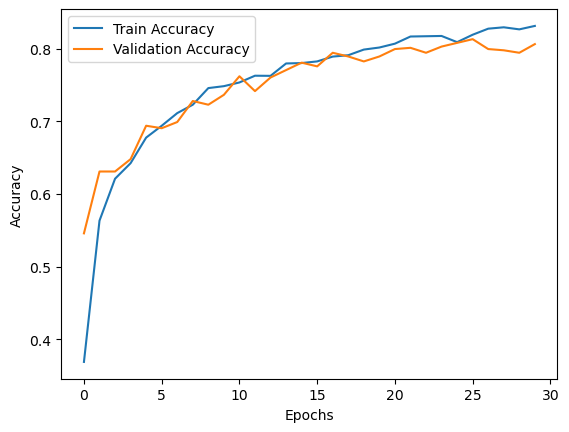

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

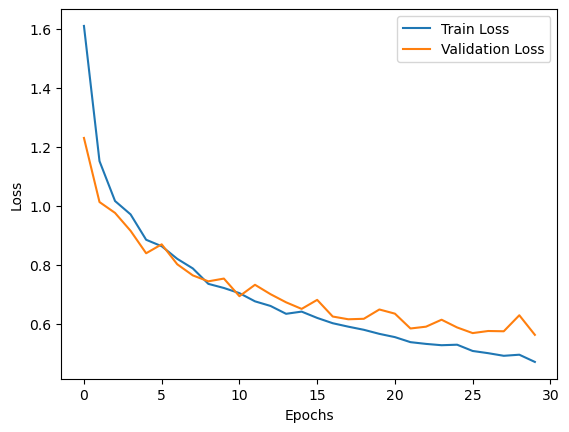

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

19/19 [==============================] - 1s 25ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.88      0.79      0.83        97
                    Awareness       0.82      0.77      0.80        97
               Classification       0.86      0.90      0.88        73
Feelings and Problematization       0.66      0.66      0.66        71
                      Service       0.77      0.75      0.76        83
                       Stigma       0.75      0.89      0.82        82
                        Youth       0.89      0.87      0.88        85

                     accuracy                           0.81       588
                    macro avg       0.80      0.81      0.80       588
                 weighted avg       0.81      0.81      0.81       588



## BPE (Byte-Pair Encoding)

In [ ]:
from bpemb import BPEmb

bpe_id = BPEmb(lang='id', vs=100000, dim=100)

In [ ]:
embedding_matrix = data['cleanText'].apply(bpe_id.encode_ids)

In [ ]:
max_length = max(embedding_matrix.apply(len))
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(embedding_matrix, maxlen=max_length)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(bpe_id.vectors.shape[0], bpe_id.vectors.shape[1], input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 71, 100)           10000000  
                                                                 
 bidirectional_2 (Bidirecti  (None, 71, 128)           84480     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 7)                 455       
                                                                 
Total params: 10126151 (38.63 MB)
Trainable params: 10126151 (38.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
166/166 [==============================] - 32s 171ms/step - loss: 1.6395 - accuracy: 0.3179 - val_loss: 1.3460 - val_accuracy: 0.4082
Epoch 2/30
166/166 [==============================] - 31s 187ms/step - loss: 1.1135 - accuracy: 0.5675 - val_loss: 1.0120 - val_accuracy: 0.6293
Epoch 3/30
166/166 [==============================] - 31s 187ms/step - loss: 0.7134 - accuracy: 0.7570 - val_loss: 0.7770 - val_accuracy: 0.7466
Epoch 4/30
166/166 [==============================] - 31s 186ms/step - loss: 0.4454 - accuracy: 0.8629 - val_loss: 0.6738 - val_accuracy: 0.7891
Epoch 5/30
166/166 [==============================] - 31s 187ms/step - loss: 0.3131 - accuracy: 0.9079 - val_loss: 0.6872 - val_accuracy: 0.7891
Epoch 6/30
166/166 [==============================] - 31s 187ms/step - loss: 0.2283 - accuracy: 0.9374 - val_loss: 0.7495 - val_accuracy: 0.7806
Epoch 7/30
166/166 [==============================] - 31s 187ms/step - loss: 0.1761 - accuracy: 0.9529 - val_loss: 0.6975 - val_ac

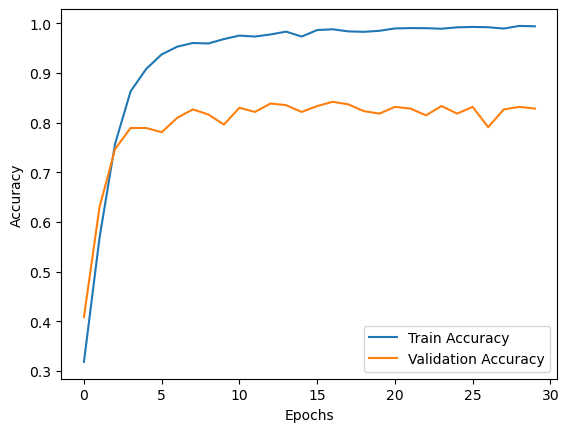

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

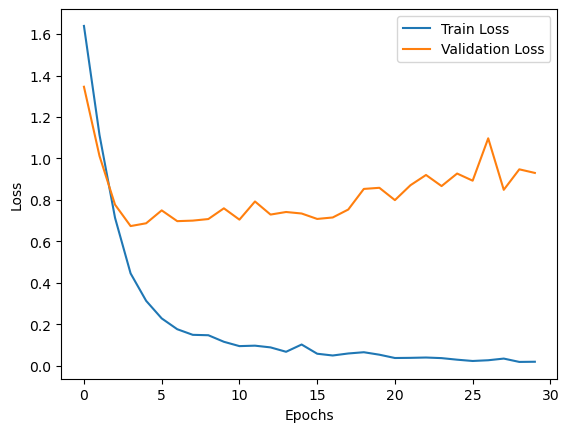

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(val_labels, predicted_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

19/19 [==============================] - 1s 19ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.89      0.89      0.89        88
                    Awareness       0.71      0.82      0.77        91
               Classification       0.89      0.91      0.90        77
Feelings and Problematization       0.77      0.46      0.58        71
                      Service       0.79      0.89      0.84        81
                       Stigma       0.84      0.88      0.86        97
                        Youth       0.91      0.89      0.90        83

                     accuracy                           0.83       588
                    macro avg       0.83      0.82      0.82       588
                 weighted avg       0.83      0.83      0.82       588



## GloVe

In [ ]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [ ]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [ ]:
glove_file = '../../glove/glove.twitter.27B.200d.txt'
embeddings_index = {}
with open(glove_file, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embeddings = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embeddings

In [ ]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 63, 200)           2021600   
                                                                 
 bidirectional (Bidirection  (None, 63, 128)           135680    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 7)                 455       
                                                                 
Total params: 2198951 (8.39 MB)
Trainable params: 177351 (692.78 KB)
Non-trainable params: 2021600 (7.71 MB)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
166/166 [==============================] - 27s 144ms/step - loss: 1.5393 - accuracy: 0.3848 - val_loss: 1.2084 - val_accuracy: 0.4830
Epoch 2/30
166/166 [==============================] - 26s 157ms/step - loss: 1.1434 - accuracy: 0.5456 - val_loss: 1.0014 - val_accuracy: 0.6037
Epoch 3/30
166/166 [==============================] - 25s 153ms/step - loss: 1.0052 - accuracy: 0.6057 - val_loss: 0.9316 - val_accuracy: 0.6514
Epoch 4/30
166/166 [==============================] - 26s 156ms/step - loss: 0.9044 - accuracy: 0.6649 - val_loss: 0.8988 - val_accuracy: 0.6735
Epoch 5/30
166/166 [==============================] - 25s 153ms/step - loss: 0.8319 - accuracy: 0.6948 - val_loss: 0.7965 - val_accuracy: 0.7041
Epoch 6/30
166/166 [==============================] - 26s 154ms/step - loss: 0.7732 - accuracy: 0.7231 - val_loss: 0.7832 - val_accuracy: 0.7177
Epoch 7/30
166/166 [==============================] - 26s 156ms/step - loss: 0.7171 - accuracy: 0.7428 - val_loss: 0.7405 - val_ac

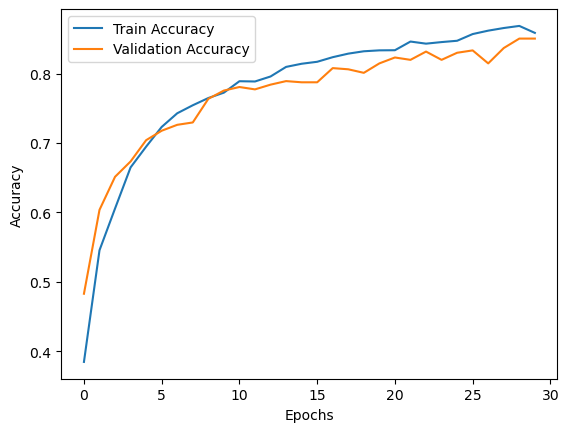

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

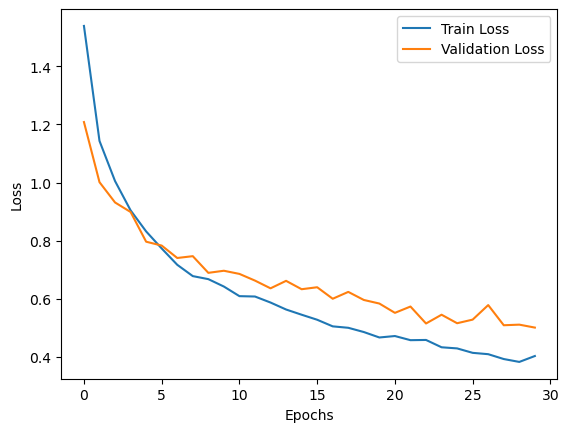

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(val_labels, predicted_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

19/19 [==============================] - 1s 20ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.84      0.90      0.87        88
                    Awareness       0.85      0.81      0.83        91
               Classification       0.91      0.90      0.90        77
Feelings and Problematization       0.72      0.80      0.76        71
                      Service       0.88      0.79      0.83        81
                       Stigma       0.83      0.87      0.85        97
                        Youth       0.94      0.88      0.91        83

                     accuracy                           0.85       588
                    macro avg       0.85      0.85      0.85       588
                 weighted avg       0.85      0.85      0.85       588

